In [2]:
### Импорт библиотек ###

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
### Импорт датасета ###

df = pd.read_csv("datasets/food_orders.csv")

In [4]:
### Основная информация о датасете ###

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
### Просмотр данных ###

df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [6]:
### Подсчет количества пропущенных/пустых значений ###

df.isna().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [7]:
### Подсчет количества дубликатов ###

df.duplicated().sum()

np.int64(0)

In [8]:
### Стат. параметры для числовых данных ###

df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [9]:
### Конвертация временных типов ###

df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

In [10]:
### Создание столбца - Время доставки (в минутах) ###

df['Delivery Time (min)'] = (
    df['Delivery Date and Time'] - df['Order Date and Time']
).dt.total_seconds() / 60

df


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Time (min)
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,46.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,42.0
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0,80.0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0,61.0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,104.0


In [11]:
### Создание столбца = Доход платформы ###

df['Platform Revenue'] = (
    df['Commission Fee'] +
    df['Payment Processing Fee'] -
    df['Refunds/Chargebacks']
)

In [12]:
### Создание столбца = Есть ли скидка? ###

df['Has Discount'] = df['Discounts and Offers'].notna()

In [13]:
### Создание столбцов - Час заказа, день заказа, месяц заказа ###

df['Order Hour'] = df['Order Date and Time'].dt.hour
df['Order Day'] = df['Order Date and Time'].dt.day_name()
df['Order Month'] = df['Order Date and Time'].dt.month

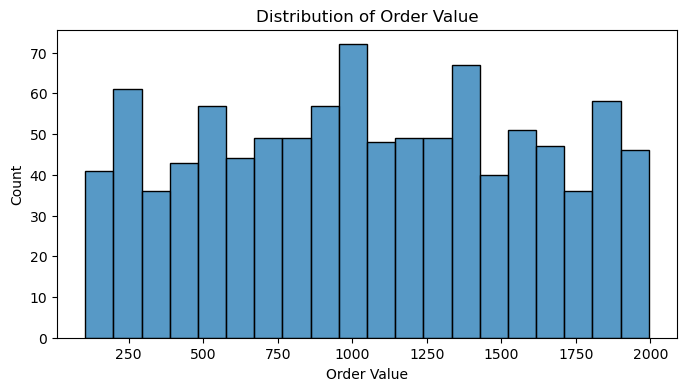

In [14]:
### Распределение цен заказа ###

plt.figure(figsize=(8,4))
sns.histplot(df['Order Value'], bins=20)
plt.title("Distribution of Order Value")
plt.show()

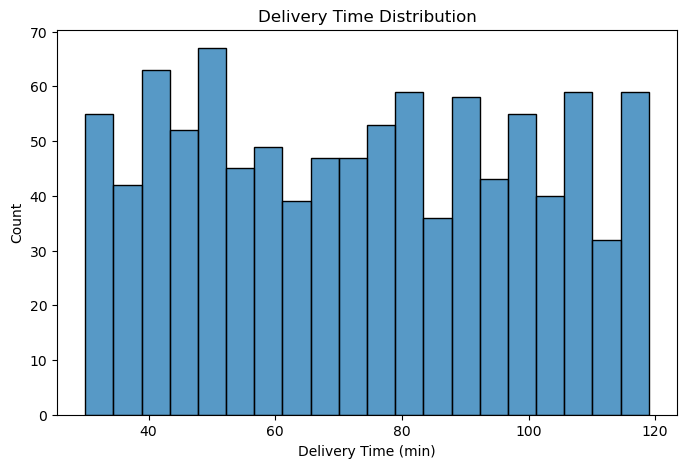

In [15]:
### Распределение времени доставки ###

plt.figure(figsize=(8,5))
sns.histplot(df['Delivery Time (min)'], bins=20)
plt.title("Delivery Time Distribution")
plt.show()

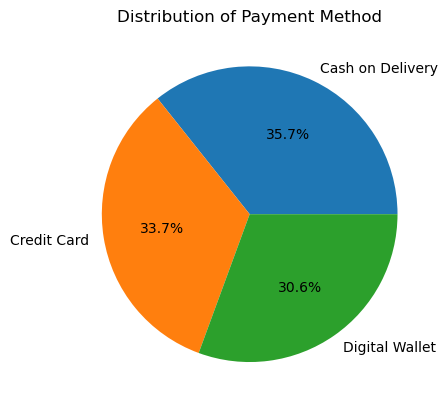

In [16]:
### Доли платежных систем ###

payment_method_count = df['Payment Method'].value_counts()

plt.pie(payment_method_count, labels=payment_method_count.index, autopct="%1.1f%%")
plt.title("Distribution of Payment Method")
plt.show()

In [ ]:
### Доля заказов топ клиентов от общего количества заказов ###

top_customers = df.groupby('Customer ID')['Order Value'].sum().sort_values(ascending=False).head(10).to_frame()
top_customers.sum() / df['Order Value'].sum() * 100

# 3,25%


Order Value    3.250001
dtype: float64

In [ ]:
### Доля заказов топ ресторанов от общего количества заказов ###

top_restaurants = df.groupby('Restaurant ID')['Platform Revenue'].sum().sort_values(ascending=False).head(10).to_frame()
top_restaurants.sum() / df['Platform Revenue'].sum() * 100

#4,87


Platform Revenue    4.869983
dtype: float64

In [ ]:
### Средняя сумма заказа со скидкой и без ###

df.groupby('Has Discount')['Order Value'].mean()

Has Discount
False    1047.875676
True     1055.352147
Name: Order Value, dtype: float64

In [ ]:
### Средний доход платформы со скидкой и без ###

df.groupby('Has Discount')['Platform Revenue'].mean()

Has Discount
False    121.081081
True     130.211043
Name: Platform Revenue, dtype: float64

In [ ]:
### Средний доход платформы в разрезе платежных методов ###

df.groupby('Payment Method')['Platform Revenue'].mean()

Payment Method
Cash on Delivery    124.436975
Credit Card         126.373887
Digital Wallet      135.653595
Name: Platform Revenue, dtype: float64

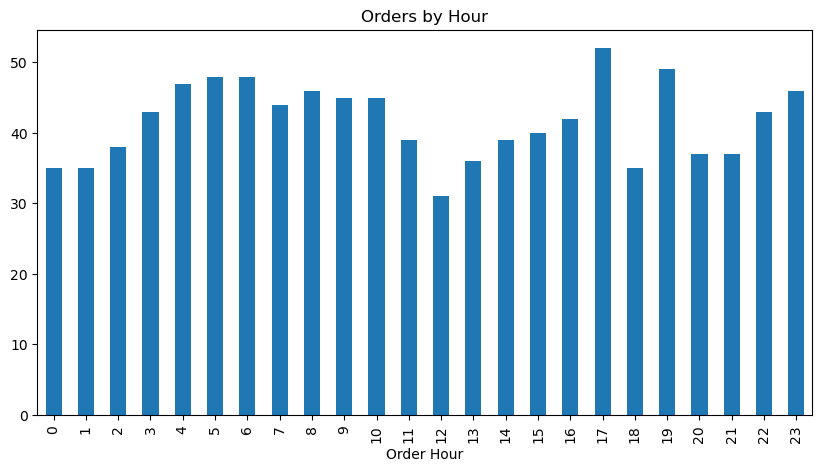

In [ ]:
### Распределение заказов по часам ###

df.groupby('Order Hour')['Order ID'].count().plot(kind='bar', figsize=(10,5))
plt.title("Orders by Hour")
plt.show()

In [ ]:
### Медианный доход платформы по дням недели ###

df.groupby('Order Day')['Platform Revenue'].median().sort_values(ascending=False)

Order Day
Sunday       141.0
Monday       140.5
Thursday     137.0
Tuesday      134.0
Friday       133.5
Wednesday    131.5
Saturday     127.0
Name: Platform Revenue, dtype: float64

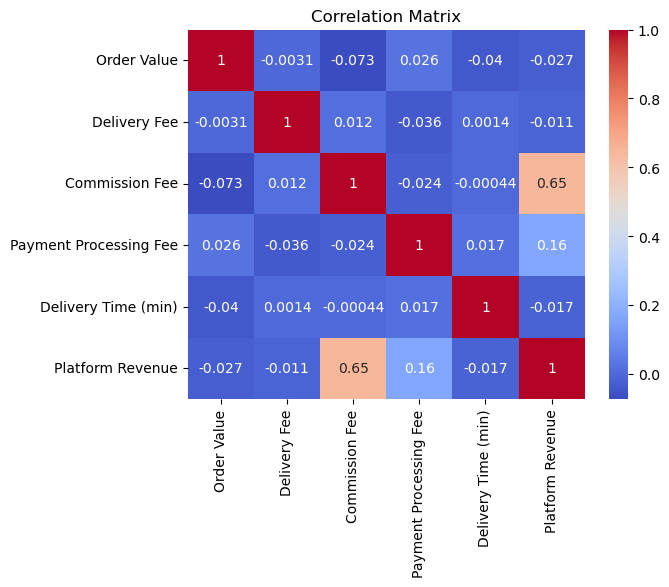

In [ ]:
### Корреляционная матрица ###

numeric_cols = [
    'Order Value', 'Delivery Fee', 'Commission Fee',
    'Payment Processing Fee', 'Delivery Time (min)', 'Platform Revenue'
]

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

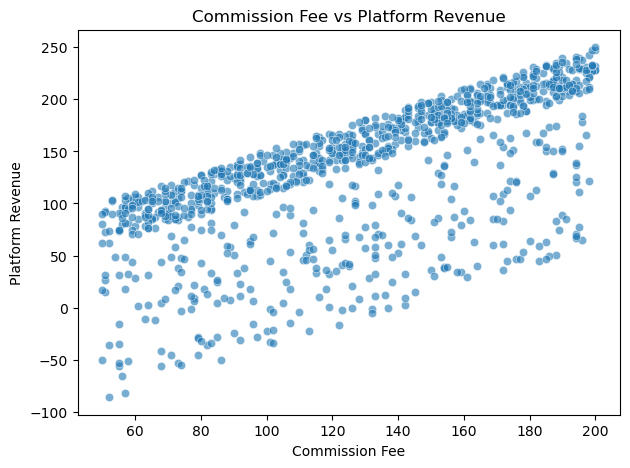

In [ ]:
### Диаграмма рассеивания - Комиссионный сбор vs Доход платформы ###

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Commission Fee',
    y='Platform Revenue',
    data=df,
    alpha=0.6
)

plt.title("Commission Fee vs Platform Revenue")
plt.xlabel("Commission Fee")
plt.ylabel("Platform Revenue")
plt.show()


In [ ]:
### Изменяем имена столбцов ###

df = df.rename(columns={
    'Order ID': 'order_id',
    'Customer ID': 'customer_id',
    'Restaurant ID': 'restaurant_id',
    'Order Date and Time': 'order_datetime',
    'Delivery Date and Time': 'delivery_datetime',
    'Order Value': 'order_value',
    'Delivery Fee': 'delivery_fee',
    'Payment Processing Fee': 'payment_processing_fee',
    'Commission Fee': 'commission_fee',
    'Refunds/Chargebacks': 'refunds',
    'Delivery Time (min)': 'delivery_time_min',
    'Platform Revenue': 'platform_revenue',
    'Payment Method': 'payment_method',
    'Has Discount': 'has_discount'
})

In [ ]:
### Экспорт датасета ###

df.to_csv('food_orders_eda.csv', index=False, sep=";")